<a href="https://colab.research.google.com/github/Shinhunjun/Data-Analysis_Study/blob/main/22_11_15(Classification(2)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd

In [27]:
from sklearn.datasets import load_iris

In [28]:

iris = load_iris()

In [29]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [31]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [33]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [35]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df_iris['target'] = target

In [37]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

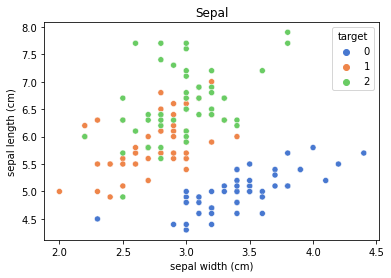

In [39]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

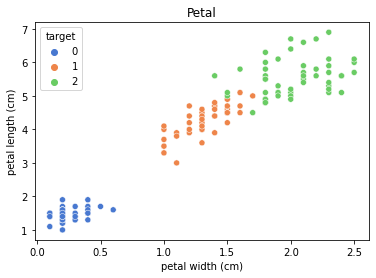

In [40]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

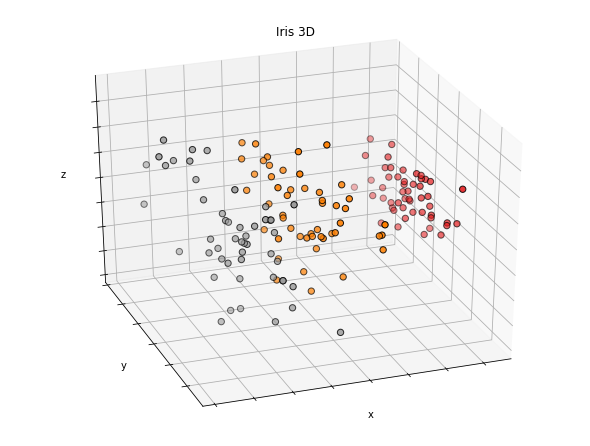

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])

In [44]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [45]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

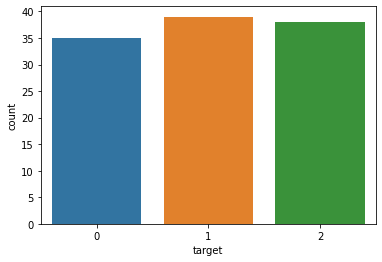

In [46]:
sns.countplot(y_train)

stratify: label의 클래스의 분포를 균등하게 배분

In [47]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

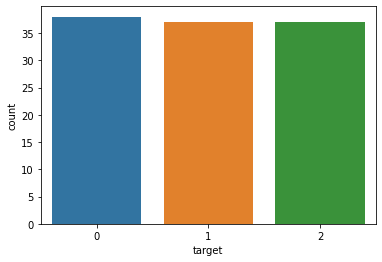

In [48]:
sns.countplot(y_train)

In [49]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [50]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### Logistic Regression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

In [52]:
model = LogisticRegression()

**step 2: 모델 학습**

In [53]:
model.fit(x_train, y_train)

LogisticRegression()

**step 3: 예측**

In [54]:
prediction = model.predict(x_valid)

In [55]:
prediction[:5]

array([1, 1, 0, 0, 0])

**step 4: 평가**

In [56]:
(prediction == y_valid).mean()

1.0

### SGDClassifier

**stochastic gradient descent (SGD)**: 확률적 경사 하강법

In [57]:
from IPython.display import Image

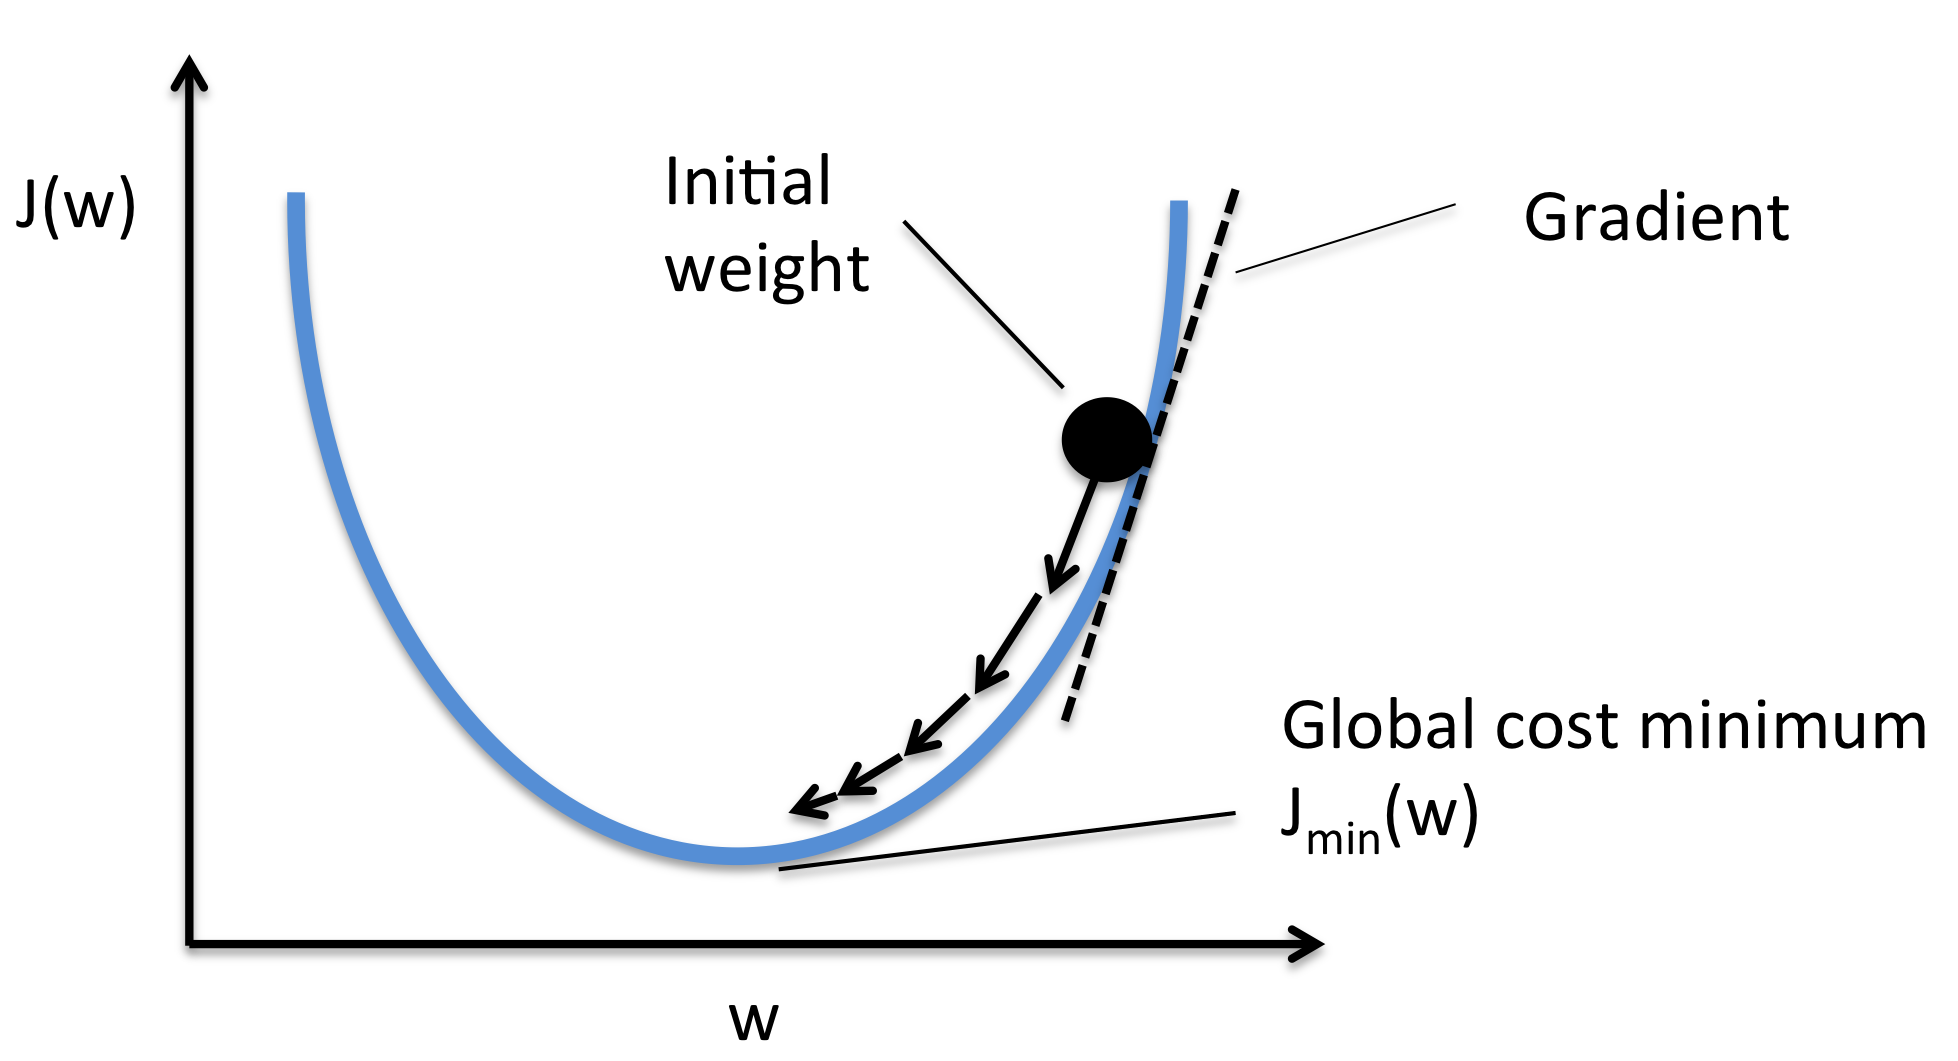

In [58]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

[sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [59]:
from sklearn.linear_model import SGDClassifier

**step 1: 모델 선언**

In [60]:
sgd = SGDClassifier(random_state=0)

**step 2: 모델 학습**

In [61]:
sgd.fit(x_train, y_train)

SGDClassifier(random_state=0)

**step 3: 예측**

In [62]:
prediction = sgd.predict(x_valid)

In [63]:
(prediction == y_valid).mean()

0.7105263157894737

In [64]:
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)

In [65]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

In [66]:
prediction = sgd.predict(x_valid)

In [67]:
(prediction == y_valid).mean()

0.7631578947368421

### KNeighborsClassifier

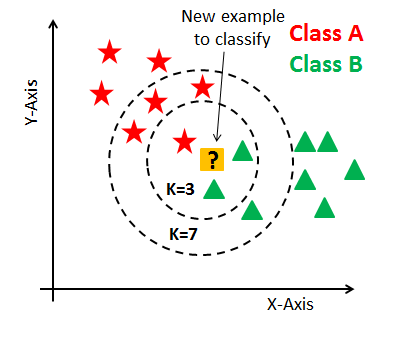

In [68]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knc = KNeighborsClassifier()

In [71]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
knc_pred = knc.predict(x_valid)

In [73]:
(knc_pred == y_valid).mean()

1.0

In [74]:
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)

In [75]:
(knc_pred == y_valid).mean()

0.9736842105263158

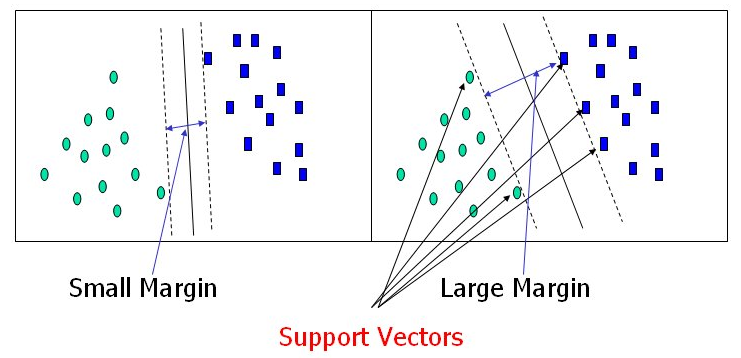

In [76]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

- OvsR 전략 사용

In [77]:
from sklearn.svm import SVC

In [78]:
svc = SVC(random_state=0,)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [79]:
svc

SVC(random_state=0)

In [80]:
(svc_pred == y_valid).mean()

0.9736842105263158

In [81]:
svc_pred[:5]

array([1, 1, 0, 0, 0])

각 클래스 별 확률값을 return 해주는 `decision_function()`

In [82]:
svc.decision_function(x_valid)[:5]

array([[-0.22246465,  2.22824801,  0.95267538],
       [-0.21628955,  2.24087076,  0.85637047],
       [ 2.22962306,  1.12410901, -0.2457815 ],
       [ 2.2240349 ,  1.16644112, -0.25096883],
       [ 2.21873525,  1.18007551, -0.25170802]])

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc = DecisionTreeClassifier(random_state=0)

In [86]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
dtc_pred = dtc.predict(x_valid)

In [88]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [89]:
from sklearn.tree import export_graphviz
from subprocess import call

In [90]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

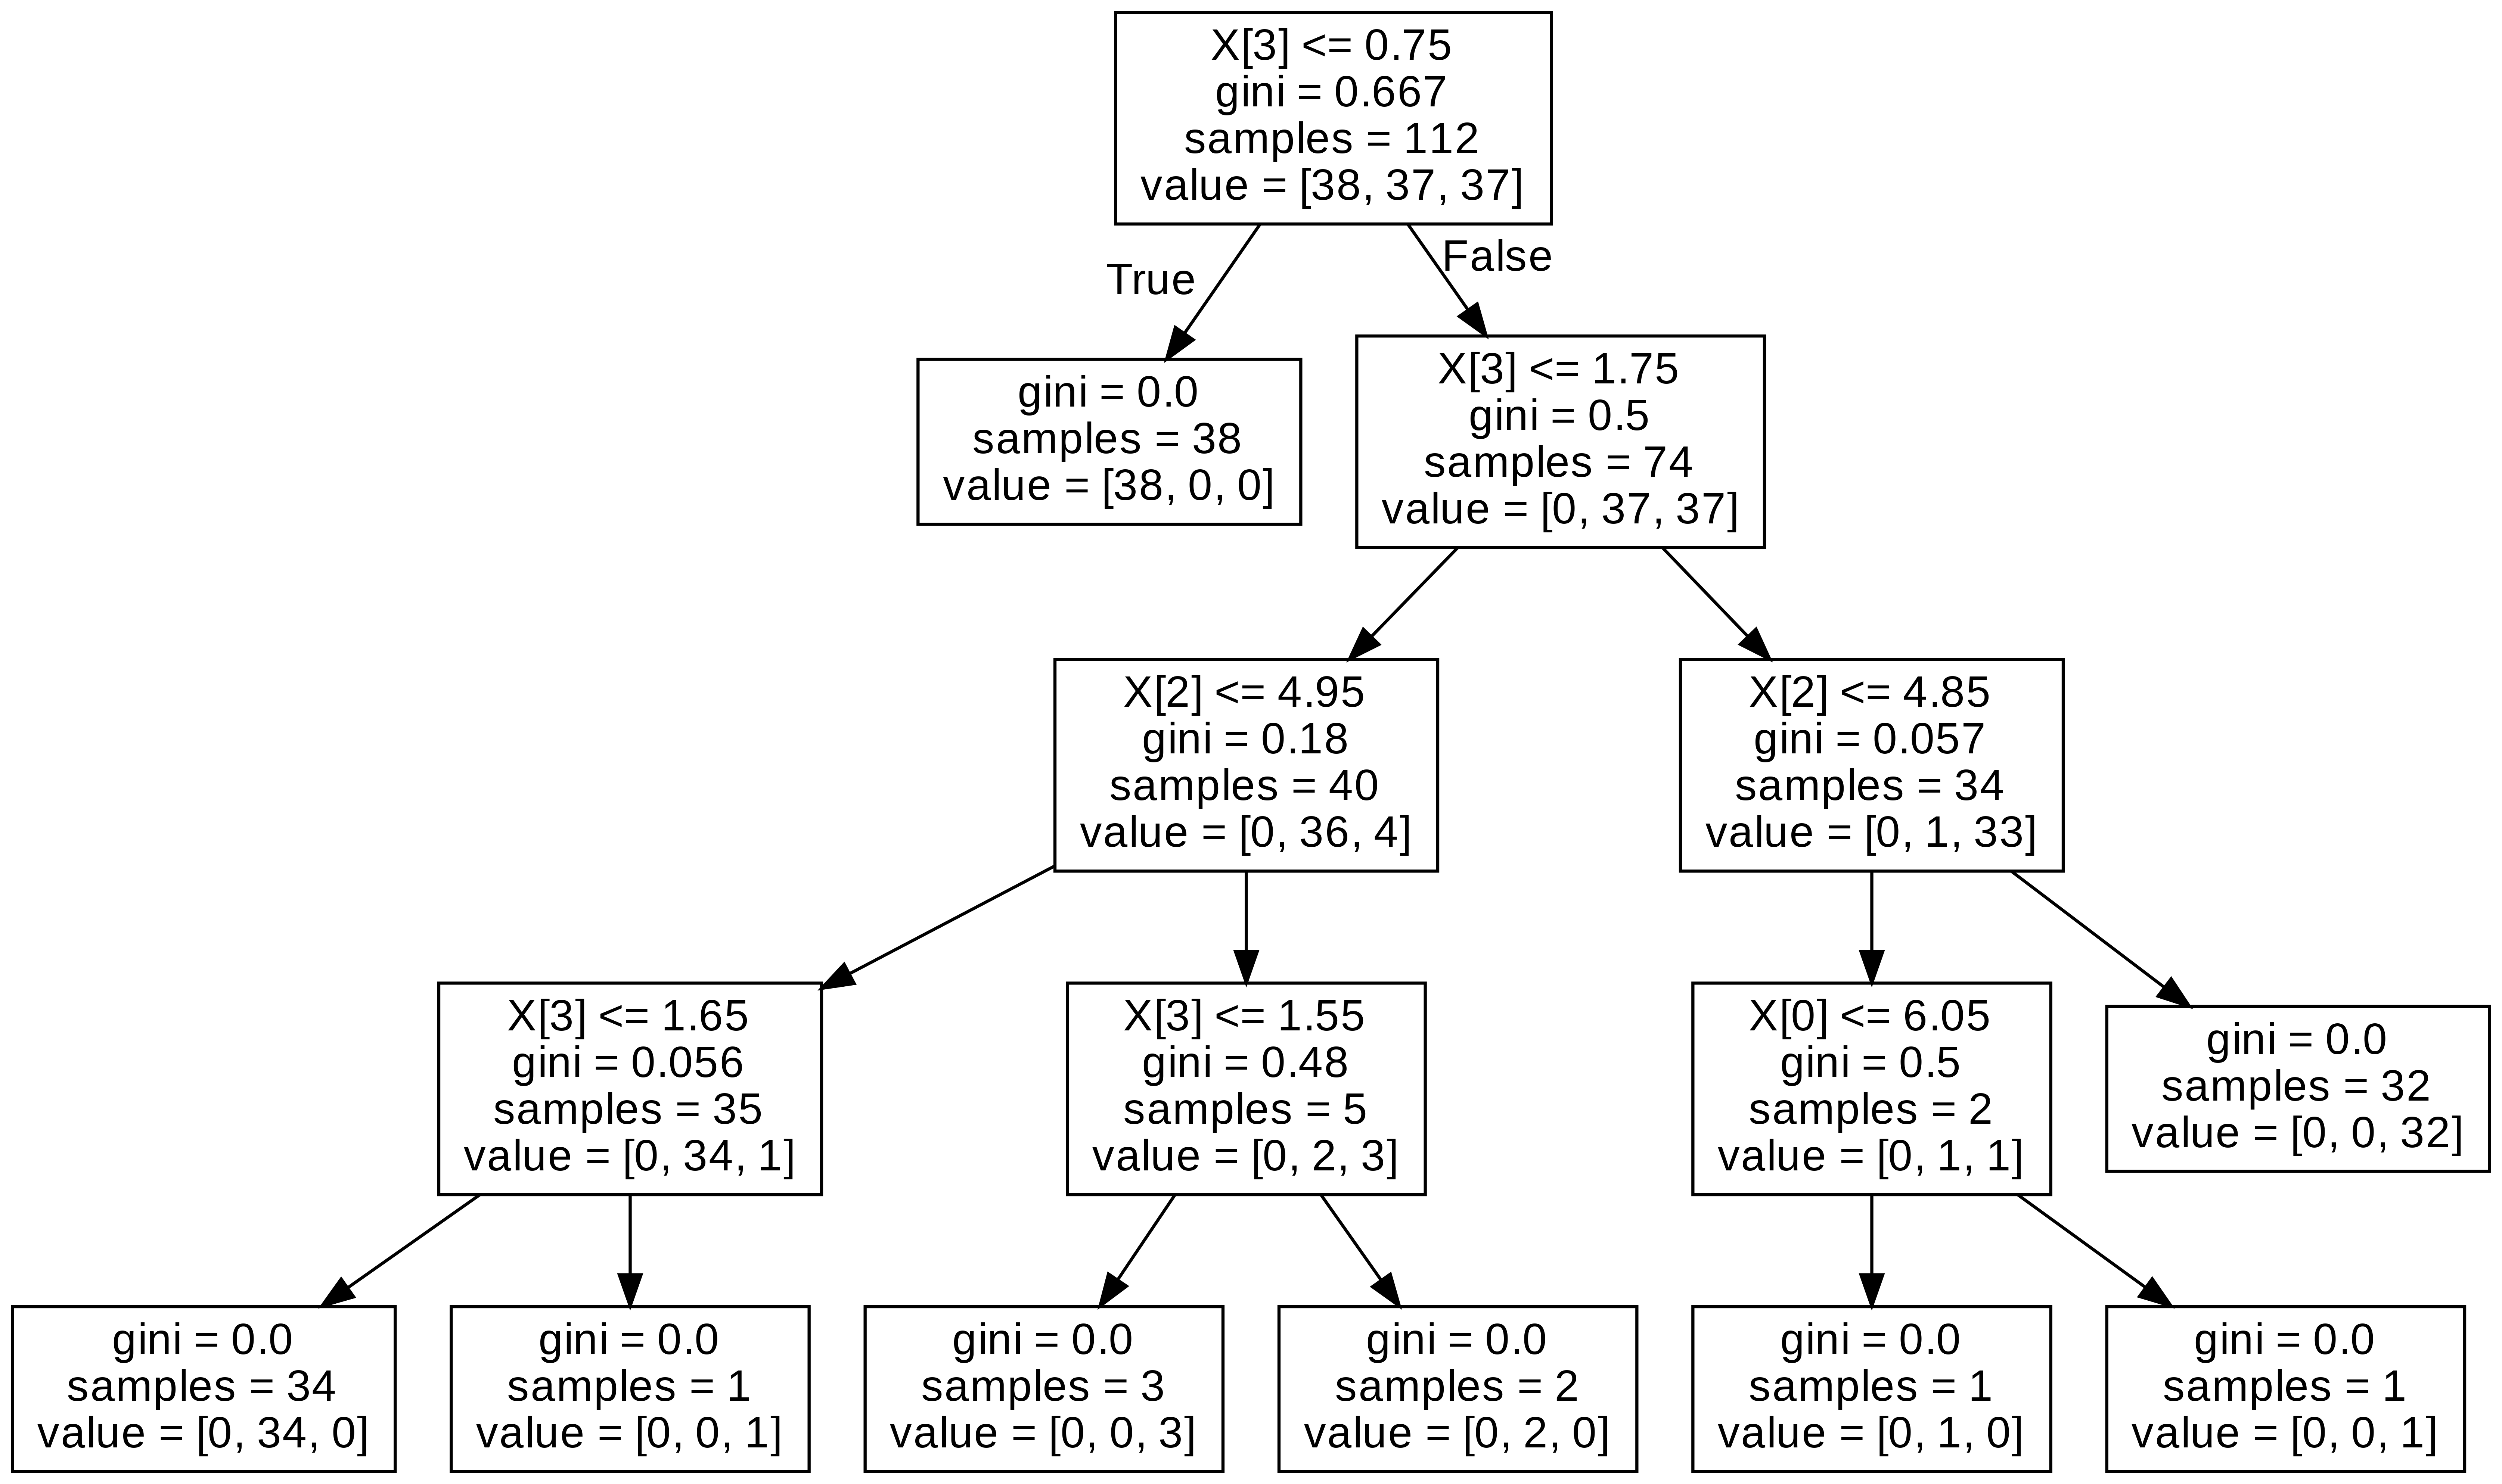

In [91]:
graph_tree(dtc)

In [92]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

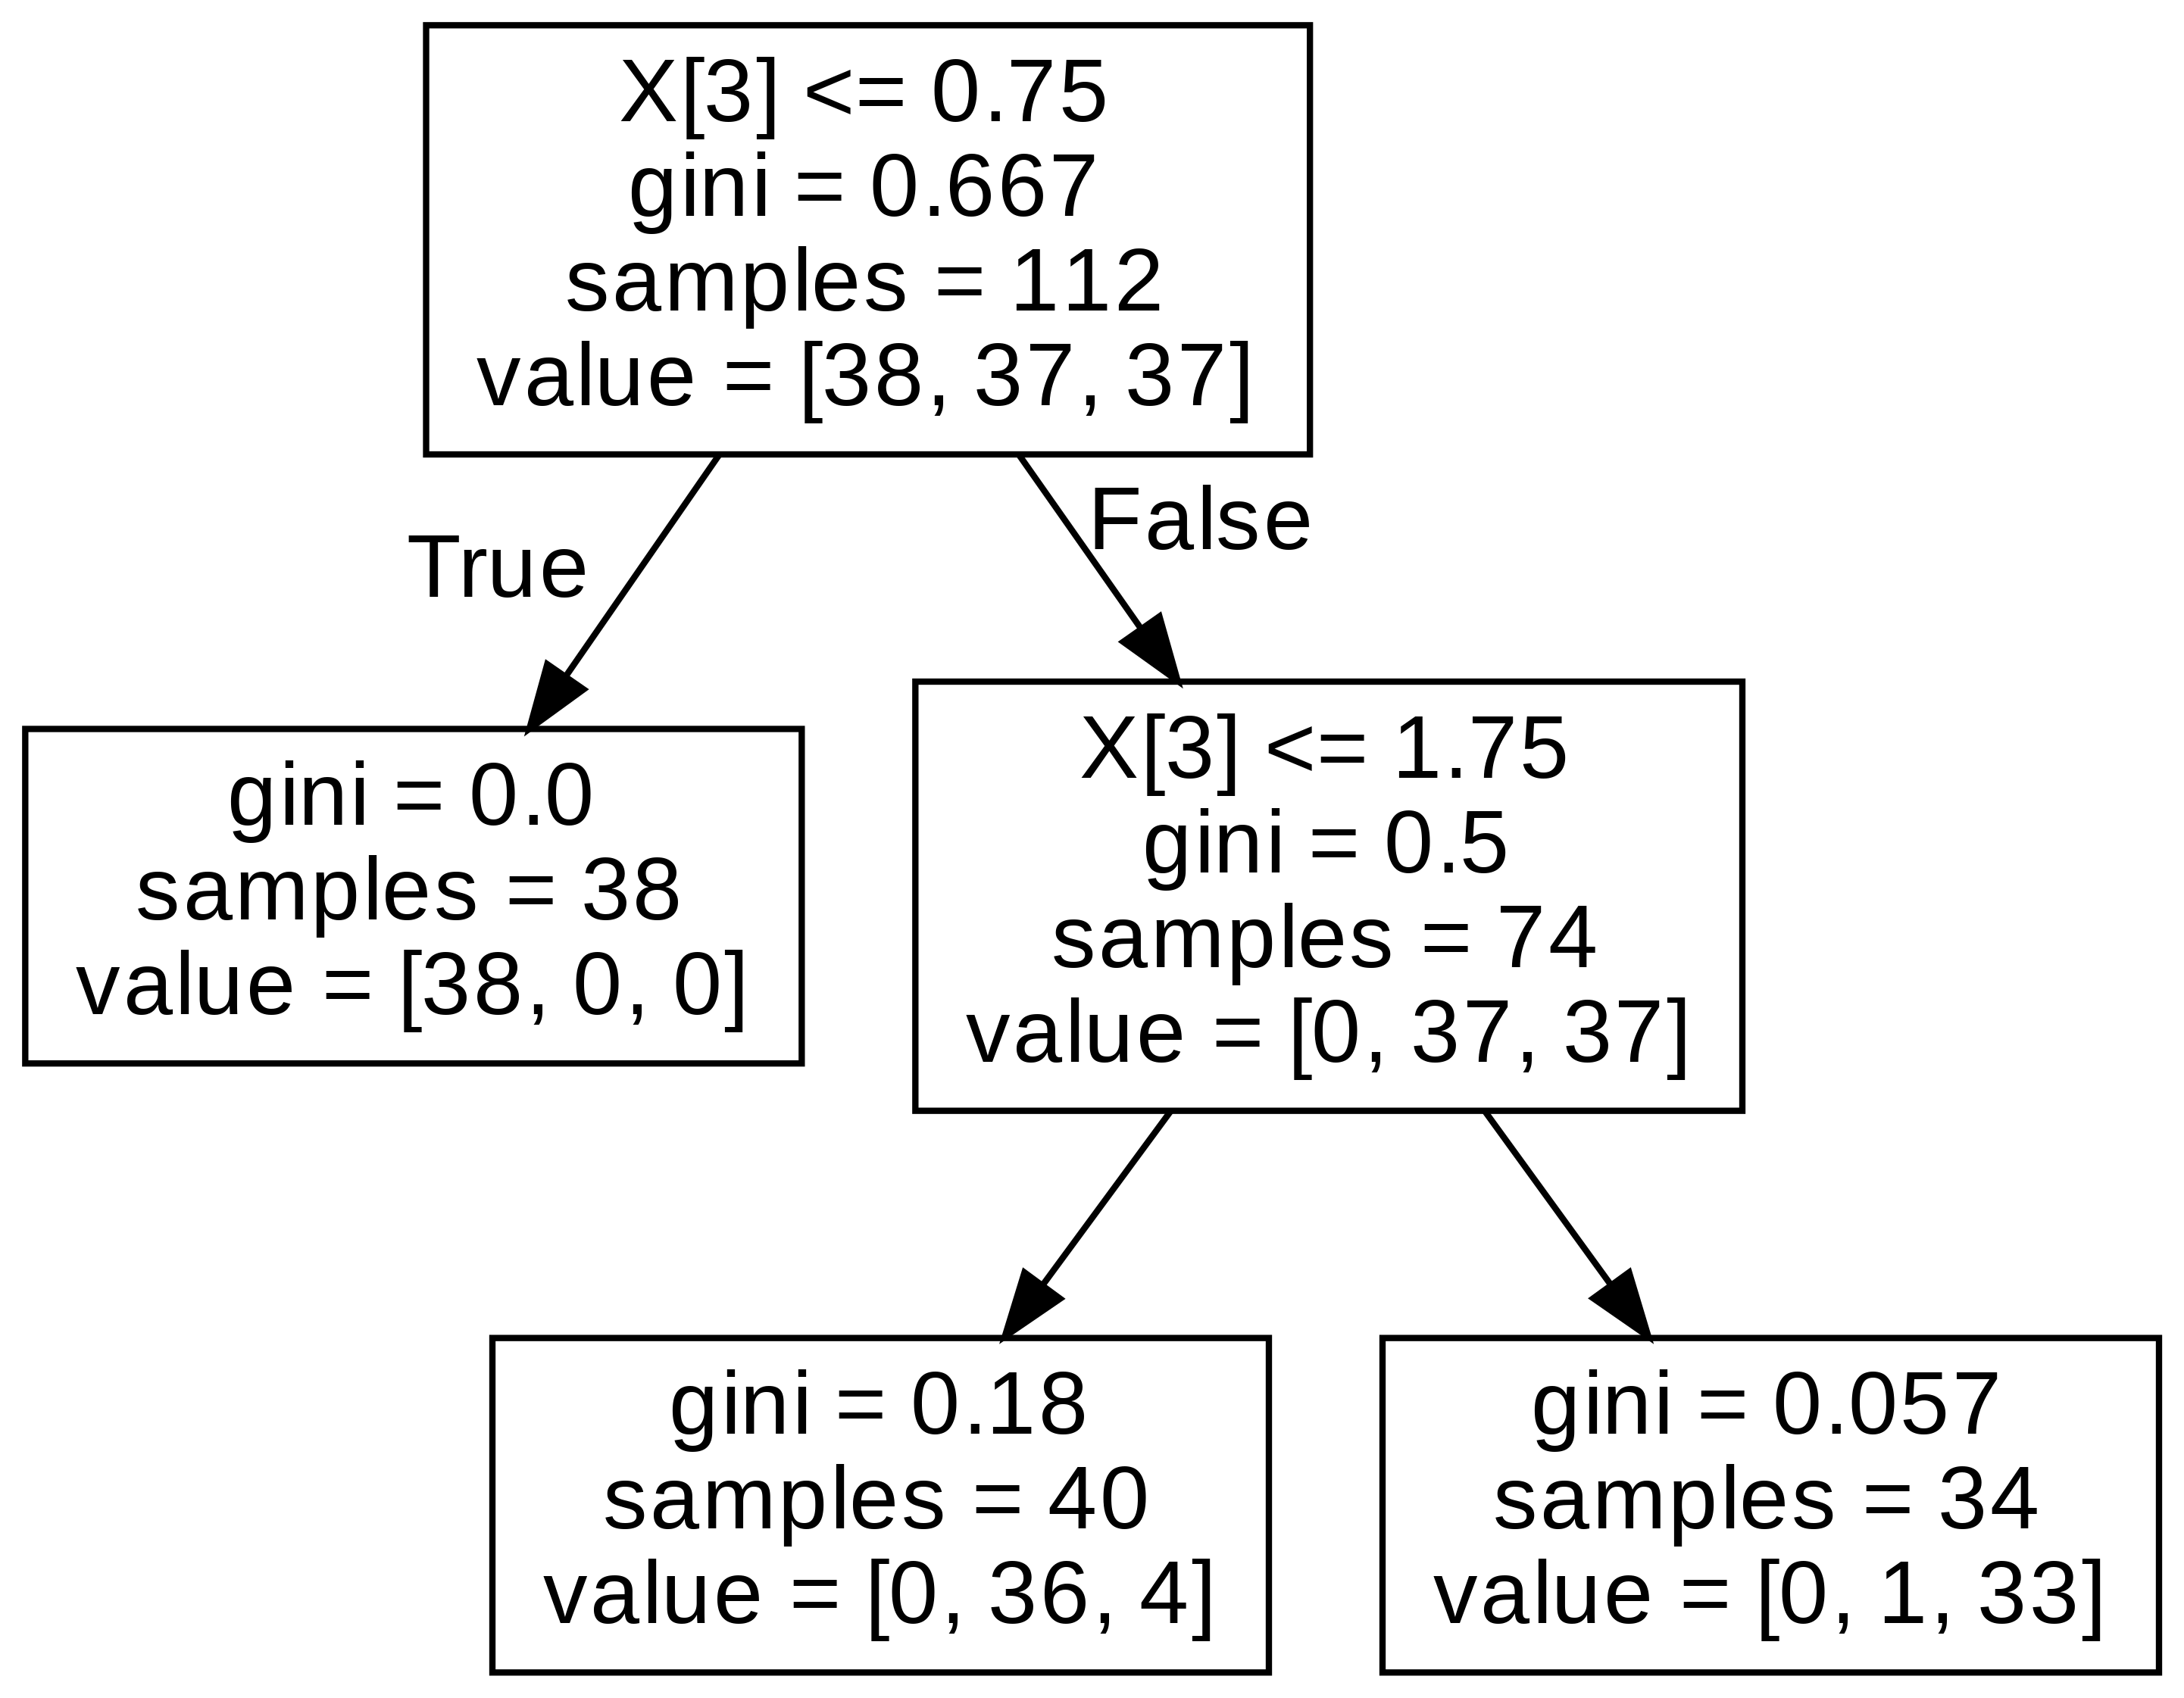

In [93]:
graph_tree(dtc)

## 오차 (Error)

### 정확도의 함정

In [94]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [95]:
cancer = load_breast_cancer()

In [96]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [97]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

In [98]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [99]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [100]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [101]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [102]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

모델을 정의하고, 학습합니다.

In [104]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [105]:
(pred == y_test).mean()

0.978021978021978

In [106]:
my_prediction = np.ones(shape=y_test.shape)

In [107]:
(my_prediction == y_test).mean()

0.989010989010989

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]])

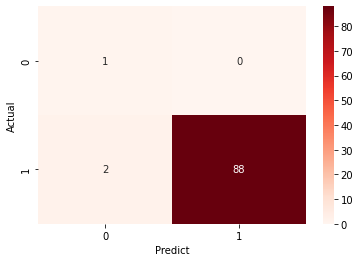

In [110]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds', )
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

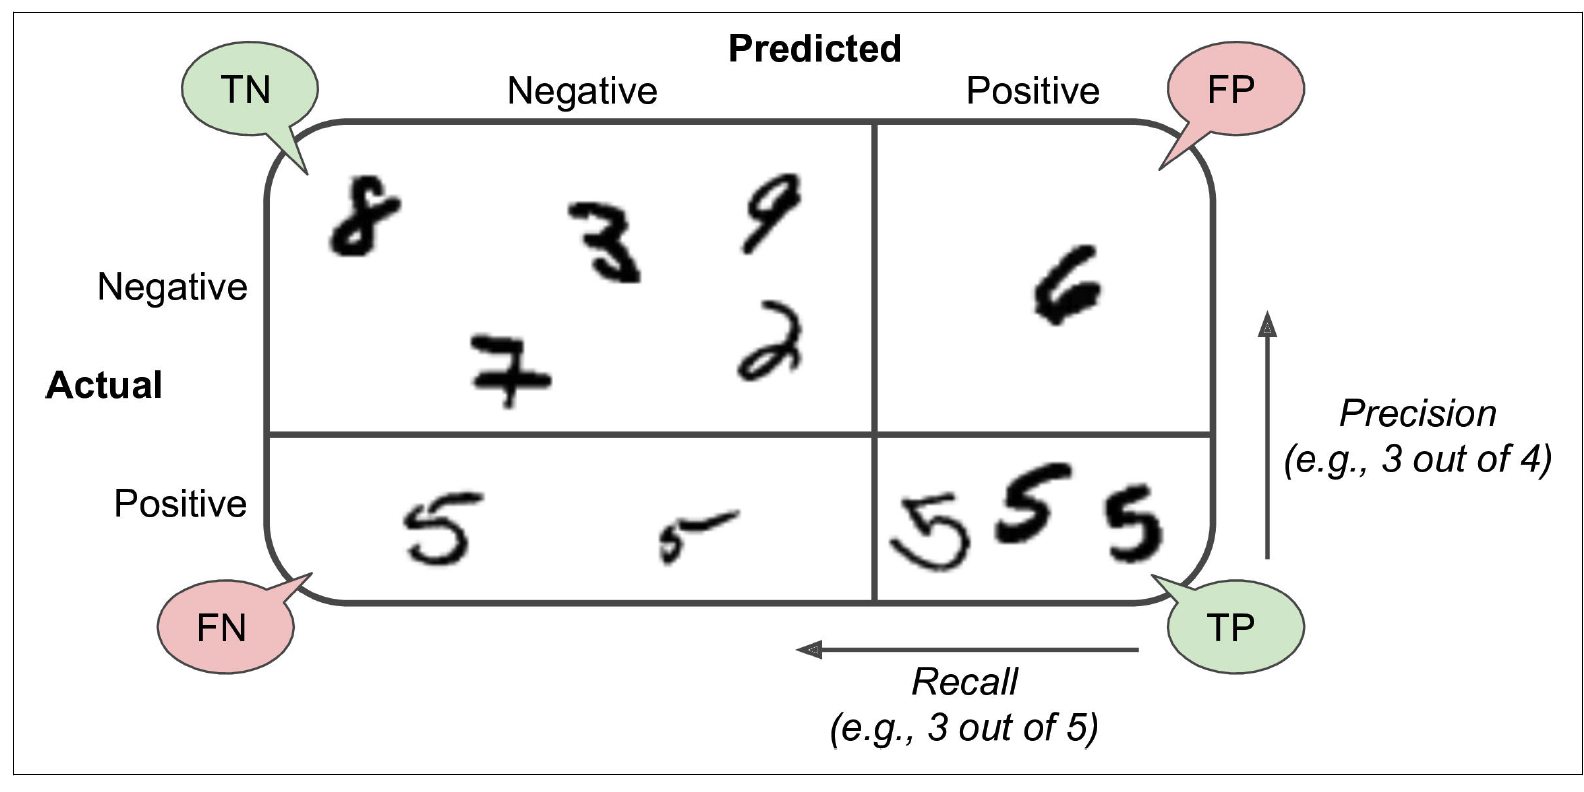

In [111]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

In [112]:
from sklearn.metrics import precision_score, recall_score

### 정밀도 (precision)

양성 예측 정확도

TP / (TP + FP)

In [113]:
precision_score(y_test, pred)

1.0

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 재현율 (recall)

TP / (TP + FN)

정확하게 감지한 **양성 샘플의 비율**입니다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [114]:
recall_score(y_test, pred)

0.9777777777777777

In [115]:
88/90

0.9777777777777777

### f1 score

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [123]:
from sklearn.metrics import f1_score

In [124]:
f1_score(y_test, pred)

0.9887640449438202